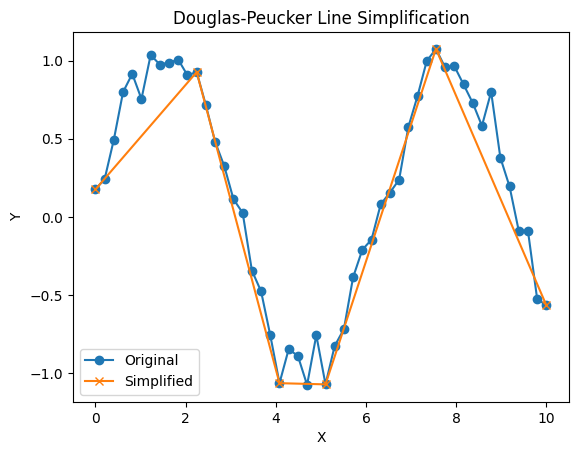

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def douglas_peucker(points, epsilon):
    if len(points) <= 2:
        return points
    
    dmax = 0
    index = 0
    
    for i in range(1, len(points) - 1):
        d = perpendicular_distance(points[i], points[0], points[-1])
        if d > dmax:
            index = i
            dmax = d
    
    if dmax > epsilon:
        recursive_result1 = douglas_peucker(points[:index + 1], epsilon)
        recursive_result2 = douglas_peucker(points[index:], epsilon)
        return np.concatenate((recursive_result1[:-1], recursive_result2))
    else:
        return np.array([points[0], points[-1]])

def perpendicular_distance(p, p1, p2):
    # Calculate the perpendicular distance of point p from line formed by p1 and p2
    return np.abs(np.cross(p2 - p1, p - p1)) / np.linalg.norm(p2 - p1)

# Generate example data
np.random.seed(0)
num_points = 50
x = np.linspace(0, 10, num_points)
y = np.sin(x) + np.random.normal(0, 0.1, num_points)
points = np.column_stack((x, y))

# Perform Douglas-Peucker simplification
epsilon = 0.5
simplified_points = douglas_peucker(points, epsilon)

# Plot the original and simplified polylines
plt.plot(points[:, 0], points[:, 1], marker='o', label='Original')
plt.plot(simplified_points[:, 0], simplified_points[:, 1], marker='x', label='Simplified')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Douglas-Peucker Line Simplification')
plt.show()
